# The Scenario

An account manager approaches me with a request. She wants to improve the revenue of undervalued apps to motivate the developers to keep working on them. I will determine which paid apps are undervalued.

In [1]:
#import library
import pandas as pd
import numpy as np

In [2]:
playstore = pd.read_csv('/Users/chanemma/Desktop/Dataquest/googleplaystore.csv')
print(playstore.shape)
playstore.head()

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Data Cleansing

It is known that row 10472 has incorrect data, so it will be dropped.

In [3]:
playstore = playstore.drop([10472])
print(playstore.shape)

(10840, 13)


It is noticed that there are several columns which should have a numeric format but their type is object.

In [4]:
playstore.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [5]:
dollarsign = playstore[playstore["Price"] != "0"]
dollarsign.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,$3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up


In [6]:
playstore["Price"] = playstore["Price"].str.replace("$","").astype("float")
playstore.dtypes

<ipython-input-6-7b09a37b3ce4>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  playstore["Price"] = playstore["Price"].str.replace("$","").astype("float")


App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

After cleaning the data in "Price" column, next step is to filter out the paid apps.

In [7]:
paid_apps = playstore[playstore["Price"] > 0].copy()

In the following, columns "Reviews" & "Size" will be cleaned.

In [8]:
paid_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 234 to 10798
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             800 non-null    object 
 1   Category        800 non-null    object 
 2   Rating          647 non-null    float64
 3   Reviews         800 non-null    object 
 4   Size            800 non-null    object 
 5   Installs        800 non-null    object 
 6   Type            800 non-null    object 
 7   Price           800 non-null    float64
 8   Content Rating  800 non-null    object 
 9   Genres          800 non-null    object 
 10  Last Updated    800 non-null    object 
 11  Current Ver     798 non-null    object 
 12  Android Ver     799 non-null    object 
dtypes: float64(2), object(11)
memory usage: 87.5+ KB


In [9]:
def clean_size(size):
    size = size.replace("M","")
    if size.endswith("k"):
        size = float(size[:-1])/1000
    elif size == "Varies with device":
        size = np.NaN
    else:
        size = float(size)
    return size

paid_apps["Reviews"] = paid_apps["Reviews"].astype(int)
paid_apps["Size"] = paid_apps["Size"].apply(clean_size)

In [10]:
paid_apps.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.800,"100,000+",Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.000,"100,000+",Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.800,"100,000+",Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.000,"100,000+",Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,NaN,"100,000+",Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,NaN,"10,000+",Paid,3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up
477,Calculator,DATING,2.6,57,6.200,"1,000+",Paid,6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up
478,Truth or Dare Pro,DATING,NaN,0,20.000,50+,Paid,1.49,Teen,Dating,"September 1, 2017",1.0,4.0 and up
479,"Private Dating, Hide App- Blue for PrivacyHider",DATING,NaN,0,0.018,100+,Paid,2.99,Everyone,Dating,"July 25, 2017",1.0.1,4.0 and up
480,Ad Blocker for SayHi,DATING,NaN,4,1.200,100+,Paid,3.99,Teen,Dating,"August 2, 2018",1.2,4.0.3 and up


To further investigate the column 'App'

In [11]:
paid_apps = paid_apps.sort_values(by=["App"])
paid_apps.reset_index(inplace=True)
paid_apps.head(15)

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,7738,10 WPM Amateur ham radio CW Morse code trainer,COMMUNICATION,3.5,10,3.8,100+,Paid,1.49,Everyone,Communication,"May 12, 2018",2.1.4,2.1 and up
1,8219,"10,000 Quotes DB (Premium)",BOOKS_AND_REFERENCE,4.1,70,3.5,500+,Paid,0.99,Everyone,Books & Reference,"August 30, 2013",1.3,2.1 and up
2,6760,17th Edition Cable Sizer,BOOKS_AND_REFERENCE,4.4,47,1.4,"1,000+",Paid,3.08,Everyone,Books & Reference,"May 27, 2016",1.22,2.2 and up
3,7993,2 Amateur ham radio CW Morse code practice key...,COMMUNICATION,4.8,6,3.5,100+,Paid,1.49,Everyone,Communication,"March 5, 2018",1.0.9,1.6 and up
4,2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8,"1,000+",Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
5,2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8,"1,000+",Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
6,8004,20WPM Amateur ham radio Koch CW Morse code tra...,COMMUNICATION,4.3,12,3.7,100+,Paid,1.49,Everyone,Communication,"May 22, 2018",3.0.4,2.1 and up
7,7466,211:CK,GAME,5.0,8,38.0,10+,Paid,0.99,Teen,Arcade,"April 11, 2018",1.3,4.1 and up
8,7745,25WPM Amateur ham radio Koch CW Morse code tra...,TOOLS,NaN,0,3.7,10+,Paid,1.49,Everyone,Tools,"May 18, 2018",2.0.3,2.1 and up
9,8018,30WPM Amateur ham radio Koch CW Morse code tra...,FAMILY,5.0,1,3.7,10+,Paid,1.49,Everyone,Education,"May 18, 2018",2.0.2,2.1 and up


There are apps more than 1 row and the duplicated rows will be dropped

In [12]:
paid_apps.iloc[[4,5,11,12]]

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4,2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8,"1,000+",Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
5,2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8,"1,000+",Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
11,2301,A Manual of Acupuncture,MEDICAL,3.5,214,68.0,"1,000+",Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
12,2402,A Manual of Acupuncture,MEDICAL,3.5,214,68.0,"1,000+",Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up


In [13]:
duplicated_rows = paid_apps.duplicated().sum()
number_dup_apps = paid_apps.duplicated("App").sum()
print(f'Number of duplicate rows: {duplicated_rows}')
print(f'Number of duplicate apps: {number_dup_apps}')

Number of duplicate rows: 0
Number of duplicate apps: 44


In [14]:
paid_apps.drop_duplicates("App",inplace=True)
paid_apps.reset_index(inplace=True)
print(paid_apps.shape)
paid_apps.head(15)

(756, 15)


,level_0,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,7738,10 WPM Amateur ham radio CW Morse code trainer,COMMUNICATION,3.5,10,3.8,100+,Paid,1.49,Everyone,Communication,"May 12, 2018",2.1.4,2.1 and up
1,1,8219,"10,000 Quotes DB (Premium)",BOOKS_AND_REFERENCE,4.1,70,3.5,500+,Paid,0.99,Everyone,Books & Reference,"August 30, 2013",1.3,2.1 and up
2,2,6760,17th Edition Cable Sizer,BOOKS_AND_REFERENCE,4.4,47,1.4,"1,000+",Paid,3.08,Everyone,Books & Reference,"May 27, 2016",1.22,2.2 and up
3,3,7993,2 Amateur ham radio CW Morse code practice key...,COMMUNICATION,4.8,6,3.5,100+,Paid,1.49,Everyone,Communication,"March 5, 2018",1.0.9,1.6 and up
4,4,2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8,"1,000+",Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
5,6,8004,20WPM Amateur ham radio Koch CW Morse code tra...,COMMUNICATION,4.3,12,3.7,100+,Paid,1.49,Everyone,Communication,"May 22, 2018",3.0.4,2.1 and up
6,7,7466,211:CK,GAME,5.0,8,38.0,10+,Paid,0.99,Teen,Arcade,"April 11, 2018",1.3,4.1 and up
7,8,7745,25WPM Amateur ham radio Koch CW Morse code tra...,TOOLS,NaN,0,3.7,10+,Paid,1.49,Everyone,Tools,"May 18, 2018",2.0.3,2.1 and up
8,9,8018,30WPM Amateur ham radio Koch CW Morse code tra...,FAMILY,5.0,1,3.7,10+,Paid,1.49,Everyone,Education,"May 18, 2018",2.0.2,2.1 and up
9,10,5475,500 AP World History Questions,FAMILY,4.7,7,1.2,100+,Paid,9.99,Everyone,Education,"November 1, 2013",1.2,1.6 and up


# Price Exploration

After cleaning the data, I will explore the paid apps and their price distribution.

array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

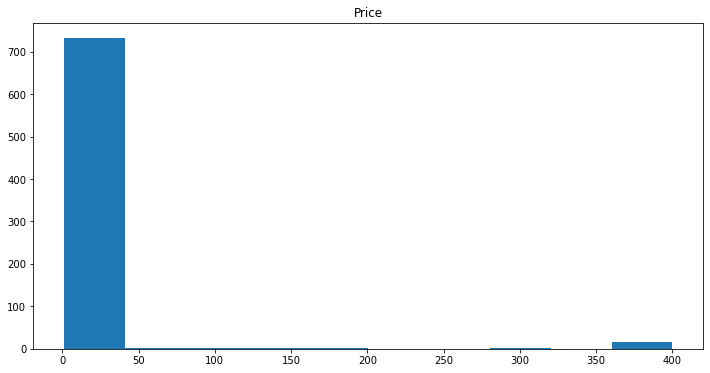

In [15]:
paid_apps.hist(column="Price", grid=False, figsize=(12,6))

Above bar chart shows that most of the paid apps are in > 0 to < 50 price range. I will continue to explore the paid apps between 0-50 price range.

array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

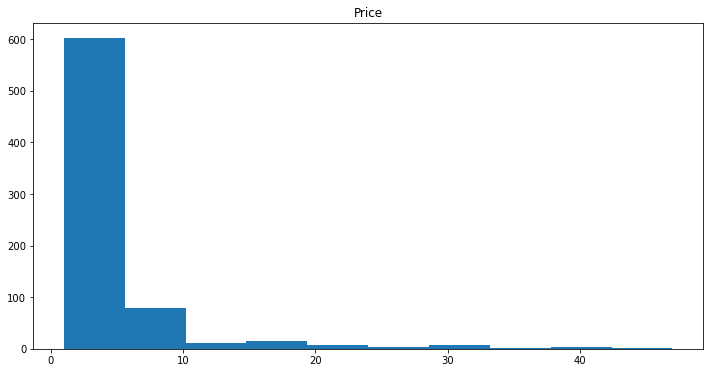

In [16]:
paid_apps = paid_apps[paid_apps["Price"] < 50].copy()
paid_apps.hist(column="Price", grid=False, figsize=(12,6))

There seems to be a clear difference between the amount of apps costing less 5 and the remaining ones. I will create a mask called cheap to identify the apps that cost less than 5 and a mask called reasonable to identify the apps that cost 5 or more.

array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

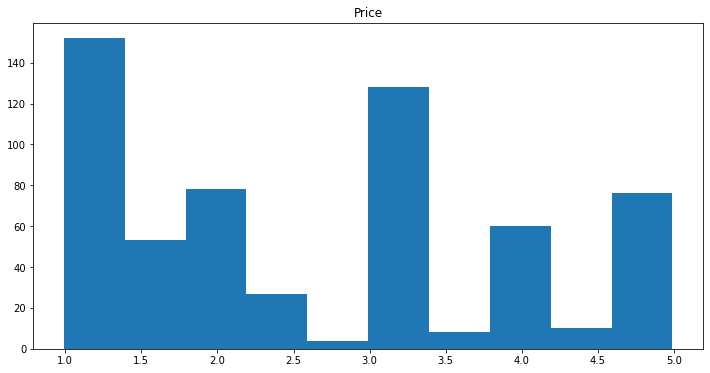

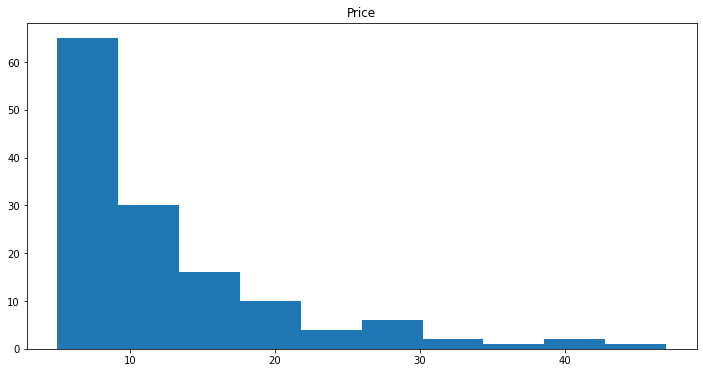

In [17]:
cheap = paid_apps["Price"]<5
reasonable = paid_apps["Price"]>=5
paid_apps[cheap].hist(column="Price",grid=False,figsize=(12,6))
paid_apps[reasonable].hist(column="Price",grid=False,figsize=(12,6))

In [18]:
paid_apps.loc[cheap,'affordability']='cheap'
paid_apps.loc[reasonable,'affordability']='reasonable'
paid_apps.head()

,level_0,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability
0,0,7738,10 WPM Amateur ham radio CW Morse code trainer,COMMUNICATION,3.5,10,3.8,100+,Paid,1.49,Everyone,Communication,"May 12, 2018",2.1.4,2.1 and up,cheap
1,1,8219,"10,000 Quotes DB (Premium)",BOOKS_AND_REFERENCE,4.1,70,3.5,500+,Paid,0.99,Everyone,Books & Reference,"August 30, 2013",1.3,2.1 and up,cheap
2,2,6760,17th Edition Cable Sizer,BOOKS_AND_REFERENCE,4.4,47,1.4,"1,000+",Paid,3.08,Everyone,Books & Reference,"May 27, 2016",1.22,2.2 and up,cheap
3,3,7993,2 Amateur ham radio CW Morse code practice key...,COMMUNICATION,4.8,6,3.5,100+,Paid,1.49,Everyone,Communication,"March 5, 2018",1.0.9,1.6 and up,cheap
4,4,2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8,"1,000+",Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,reasonable


In the following session, I'm going to test the correlation between column price & rating.

-0.0559377150546303


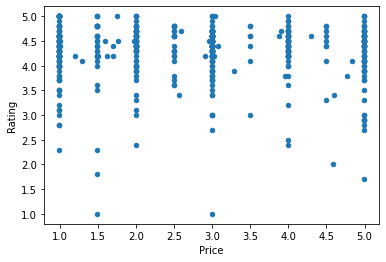

In [19]:
paid_apps[cheap].plot(kind="scatter", x="Price", y="Rating")
print(paid_apps[cheap].corr().loc["Rating", "Price"])

-0.0486096470851306


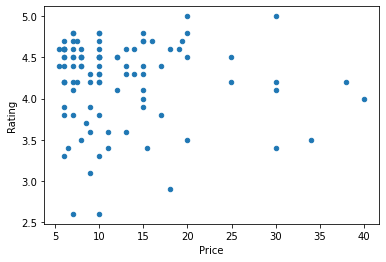

In [20]:
paid_apps[reasonable].plot(kind="scatter", x="Price", y="Rating")
print(paid_apps[reasonable].corr().loc["Rating", "Price"])

The above charts show that In the graph above, there doesn't seem to be any clear relation between price and rating for the apps. In the following, mean will be applied to categorise the paid apps.

In [21]:
cheap_mean = paid_apps[cheap]["Price"].mean()
print(f"cheap_mean:{cheap_mean}")
reasonable_mean = paid_apps[reasonable]["Price"].mean()
print(f"reasonable_mean:{reasonable_mean}")

cheap_mean:2.580318791946316
reasonable_mean:12.44868613138687


Create a column called price_criterion that takes the value 1 when the app's price is lower than mean, and 0 otherwise.

In [22]:
paid_apps.loc[cheap, "price_criterion"] = paid_apps["Price"].apply(lambda price: 1 if price < cheap_mean  else 0)
paid_apps.head()

,level_0,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion
0,0,7738,10 WPM Amateur ham radio CW Morse code trainer,COMMUNICATION,3.5,10,3.8,100+,Paid,1.49,Everyone,Communication,"May 12, 2018",2.1.4,2.1 and up,cheap,1.0
1,1,8219,"10,000 Quotes DB (Premium)",BOOKS_AND_REFERENCE,4.1,70,3.5,500+,Paid,0.99,Everyone,Books & Reference,"August 30, 2013",1.3,2.1 and up,cheap,1.0
2,2,6760,17th Edition Cable Sizer,BOOKS_AND_REFERENCE,4.4,47,1.4,"1,000+",Paid,3.08,Everyone,Books & Reference,"May 27, 2016",1.22,2.2 and up,cheap,0.0
3,3,7993,2 Amateur ham radio CW Morse code practice key...,COMMUNICATION,4.8,6,3.5,100+,Paid,1.49,Everyone,Communication,"March 5, 2018",1.0.9,1.6 and up,cheap,1.0
4,4,2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8,"1,000+",Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,reasonable,NaN


In [23]:
paid_apps.loc[reasonable, "price_criterion"] = paid_apps["Price"].apply(lambda price: 1 if price < reasonable_mean else 0)
paid_apps.head()

,level_0,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion
0,0,7738,10 WPM Amateur ham radio CW Morse code trainer,COMMUNICATION,3.5,10,3.8,100+,Paid,1.49,Everyone,Communication,"May 12, 2018",2.1.4,2.1 and up,cheap,1.0
1,1,8219,"10,000 Quotes DB (Premium)",BOOKS_AND_REFERENCE,4.1,70,3.5,500+,Paid,0.99,Everyone,Books & Reference,"August 30, 2013",1.3,2.1 and up,cheap,1.0
2,2,6760,17th Edition Cable Sizer,BOOKS_AND_REFERENCE,4.4,47,1.4,"1,000+",Paid,3.08,Everyone,Books & Reference,"May 27, 2016",1.22,2.2 and up,cheap,0.0
3,3,7993,2 Amateur ham radio CW Morse code practice key...,COMMUNICATION,4.8,6,3.5,100+,Paid,1.49,Everyone,Communication,"March 5, 2018",1.0.9,1.6 and up,cheap,1.0
4,4,2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8,"1,000+",Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,reasonable,0.0


# Category & Genres Exploration

Some apps contains more than 1 genres, I'm going calculate the number of ; and +1

In [24]:
paid_apps[paid_apps['App'] == 'Minecraft']

,level_0,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion
457,485,4347,Minecraft,FAMILY,4.5,2375336,NaN,"10,000,000+",Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,reasonable,1.0


In [25]:
paid_apps["genre_count"] = paid_apps["Genres"].str.count(";")+1
paid_apps[["App","Genres","genre_count"]].head()

,App,Genres,genre_count
0,10 WPM Amateur ham radio CW Morse code trainer,Communication,1
1,"10,000 Quotes DB (Premium)",Books & Reference,1
2,17th Edition Cable Sizer,Books & Reference,1
3,2 Amateur ham radio CW Morse code practice key...,Communication,1
4,2017 EMRA Antibiotic Guide,Medical,1


In [26]:
genres_mean = paid_apps.groupby(["affordability", "genre_count"]).mean()[["Price"]]
genres_mean.head()

Price
affordability genre_count           
cheap         1             2.507448
              2             3.155672
reasonable    1            12.574627
              2             6.823333

Curiously, apps that belong to two genres are more expensive among the cheap apps and cheaper among the reasonable apps. In the following, data will be labelled.

In [27]:
def label_genres(row):
    """For each segment in `genres_mean`,
    labels the apps that cost less than its segment's mean with `1`
    and the others with `0`."""

    aff = row["affordability"]
    gc = row["genre_count"]
    price = row["Price"]

    if price < genres_mean.loc[(aff, gc)][0]:
        return 1
    else:
        return 0

paid_apps["genre_criterion"] = paid_apps.apply(label_genres, axis="columns")
paid_apps.head()

,level_0,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion,genre_count,genre_criterion
0,0,7738,10 WPM Amateur ham radio CW Morse code trainer,COMMUNICATION,3.5,10,3.8,100+,Paid,1.49,Everyone,Communication,"May 12, 2018",2.1.4,2.1 and up,cheap,1.0,1,1
1,1,8219,"10,000 Quotes DB (Premium)",BOOKS_AND_REFERENCE,4.1,70,3.5,500+,Paid,0.99,Everyone,Books & Reference,"August 30, 2013",1.3,2.1 and up,cheap,1.0,1,1
2,2,6760,17th Edition Cable Sizer,BOOKS_AND_REFERENCE,4.4,47,1.4,"1,000+",Paid,3.08,Everyone,Books & Reference,"May 27, 2016",1.22,2.2 and up,cheap,0.0,1,0
3,3,7993,2 Amateur ham radio CW Morse code practice key...,COMMUNICATION,4.8,6,3.5,100+,Paid,1.49,Everyone,Communication,"March 5, 2018",1.0.9,1.6 and up,cheap,1.0,1,1
4,4,2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8,"1,000+",Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,reasonable,0.0,1,0


In the following, I will explore the mean by Category and label the data.

In [28]:
categories_mean = paid_apps.groupby(["affordability", "Category"]).mean()[["Price"]]
categories_mean

Price
affordability Category                      
cheap         ART_AND_DESIGN        1.990000
              AUTO_AND_VEHICLES     1.740000
              BOOKS_AND_REFERENCE   2.529286
              BUSINESS              3.632857
              COMMUNICATION         2.428846
              DATING                3.115000
              EDUCATION             3.990000
              ENTERTAINMENT         3.990000
              FAMILY                2.762710
              FINANCE               3.490000
              FOOD_AND_DRINK        4.240000
              GAME                  2.547222
              HEALTH_AND_FITNESS    3.035455
              LIBRARIES_AND_DEMO    0.990000
              LIFESTYLE             2.895000
              MAPS_AND_NAVIGATION   1.656667
              MEDICAL               2.764286
              NEWS_AND_MAGAZINES    1.990000
              PARENTING             4.790000
              PERSONALIZATION       1.689873
              PHOTOGRAPHY           3.023571
              PRODUCTIVITY          2.635909
              SHOPPING              2.740000
              SOCIAL                0.990000
              SPORTS                2.773636
              TOOLS                 2.596056
              TRAVEL_AND_LOCAL      2.942222
              VIDEO_PLAYERS         1.490000
              WEATHER               3.240000
reasonable    AUTO_AND_VEHICLES     9.990000
              BOOKS_AND_REFERENCE   6.025714
              BUSINESS             14.967500
              COMMUNICATION        19.990000
              DATING                7.490000
              EDUCATION             5.990000
              FAMILY               15.426800
              FINANCE              21.240000
              GAME                 10.091000
              HEALTH_AND_FITNESS    7.740000
              LIFESTYLE            17.323333
              MAPS_AND_NAVIGATION  10.990000
              MEDICAL              13.805789
              PERSONALIZATION       8.490000
              PHOTOGRAPHY          15.190000
              PRODUCTIVITY          7.590000
              SOCIAL               13.990000
              SPORTS               19.490000
              TOOLS                11.847143
              TRAVEL_AND_LOCAL      7.823333
              VIDEO_PLAYERS         5.990000
              WEATHER               6.490000

In [29]:
def label_genres(row):
    aff = row["affordability"]
    cat = row["Category"]
    price = row["Price"]
    if price < categories_mean.loc[(aff,cat)][0]:
        return 1
    else:
        return 0
    
paid_apps['category_criterion'] = paid_apps.apply(label_genres, axis="columns")
paid_apps.head()

,level_0,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion,genre_count,genre_criterion,category_criterion
0,0,7738,10 WPM Amateur ham radio CW Morse code trainer,COMMUNICATION,3.5,10,3.8,100+,Paid,1.49,Everyone,Communication,"May 12, 2018",2.1.4,2.1 and up,cheap,1.0,1,1,1
1,1,8219,"10,000 Quotes DB (Premium)",BOOKS_AND_REFERENCE,4.1,70,3.5,500+,Paid,0.99,Everyone,Books & Reference,"August 30, 2013",1.3,2.1 and up,cheap,1.0,1,1,1
2,2,6760,17th Edition Cable Sizer,BOOKS_AND_REFERENCE,4.4,47,1.4,"1,000+",Paid,3.08,Everyone,Books & Reference,"May 27, 2016",1.22,2.2 and up,cheap,0.0,1,0,0
3,3,7993,2 Amateur ham radio CW Morse code practice key...,COMMUNICATION,4.8,6,3.5,100+,Paid,1.49,Everyone,Communication,"March 5, 2018",1.0.9,1.6 and up,cheap,1.0,1,1,1
4,4,2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8,"1,000+",Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,reasonable,0.0,1,0,0


# Results & Impact

A technique called majority voting, in which will decide whether an app's price should increase based on all criteria.

In [30]:
criteria = ["price_criterion", "genre_criterion", "category_criterion"]
paid_apps["Result"] = paid_apps[criteria].mode(axis='columns')
price_increases_apps = paid_apps["Result"].sum().astype(int)
print(f"{price_increases_apps} apps should increase price")

401 apps should increase price


A new column "New Price" will be created, to take the max between "Price" & "cheap_mean" and max between "Price" and "reasonable_mean" to determine the new price.

In [31]:
def new_price(row):
    if row["affordability"]=='cheap':
        return round(max(row["Price"], cheap_mean), 2)
    else:
        return round(max(row["Price"], reasonable_mean), 2)
    
paid_apps["New Price"]=paid_apps.apply(new_price,axis="columns")
paid_apps[["Price","affordability","New Price"]]

,Price,affordability,New Price
0,1.49,cheap,2.58
1,0.99,cheap,2.58
2,3.08,cheap,3.08
3,1.49,cheap,2.58
4,16.99,reasonable,16.99
...,...,...,...
750,1.99,cheap,2.58
751,1.99,cheap,2.58
752,1.99,cheap,2.58
753,2.99,cheap,2.99


The minimum estimated impact will be computed in following session, minimum because the number of installations represents the low end of the range — it's not the actual number of installations.

In [32]:
paid_apps["Installs"] = paid_apps["Installs"].str.replace("[+,]","").astype(int)
paid_apps["Impact"] = (paid_apps["New Price"]-paid_apps["Price"])*paid_apps["Installs"]
total_impact = paid_apps["Impact"].sum()
print(total_impact)

115441618.97999999


<ipython-input-32-f81752a2717a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  paid_apps["Installs"] = paid_apps["Installs"].str.replace("[+,]","").astype(int)


It is estimated that an additional $115 million revenue will be generated after increasing the apps price. However, this estimation cannot be an absolute conclusion. There are other factors have to be considered in real business setting.